#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_curve,roc_auc_score

#Read Data

In [ ]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Check Null and handle it

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<Axes: >

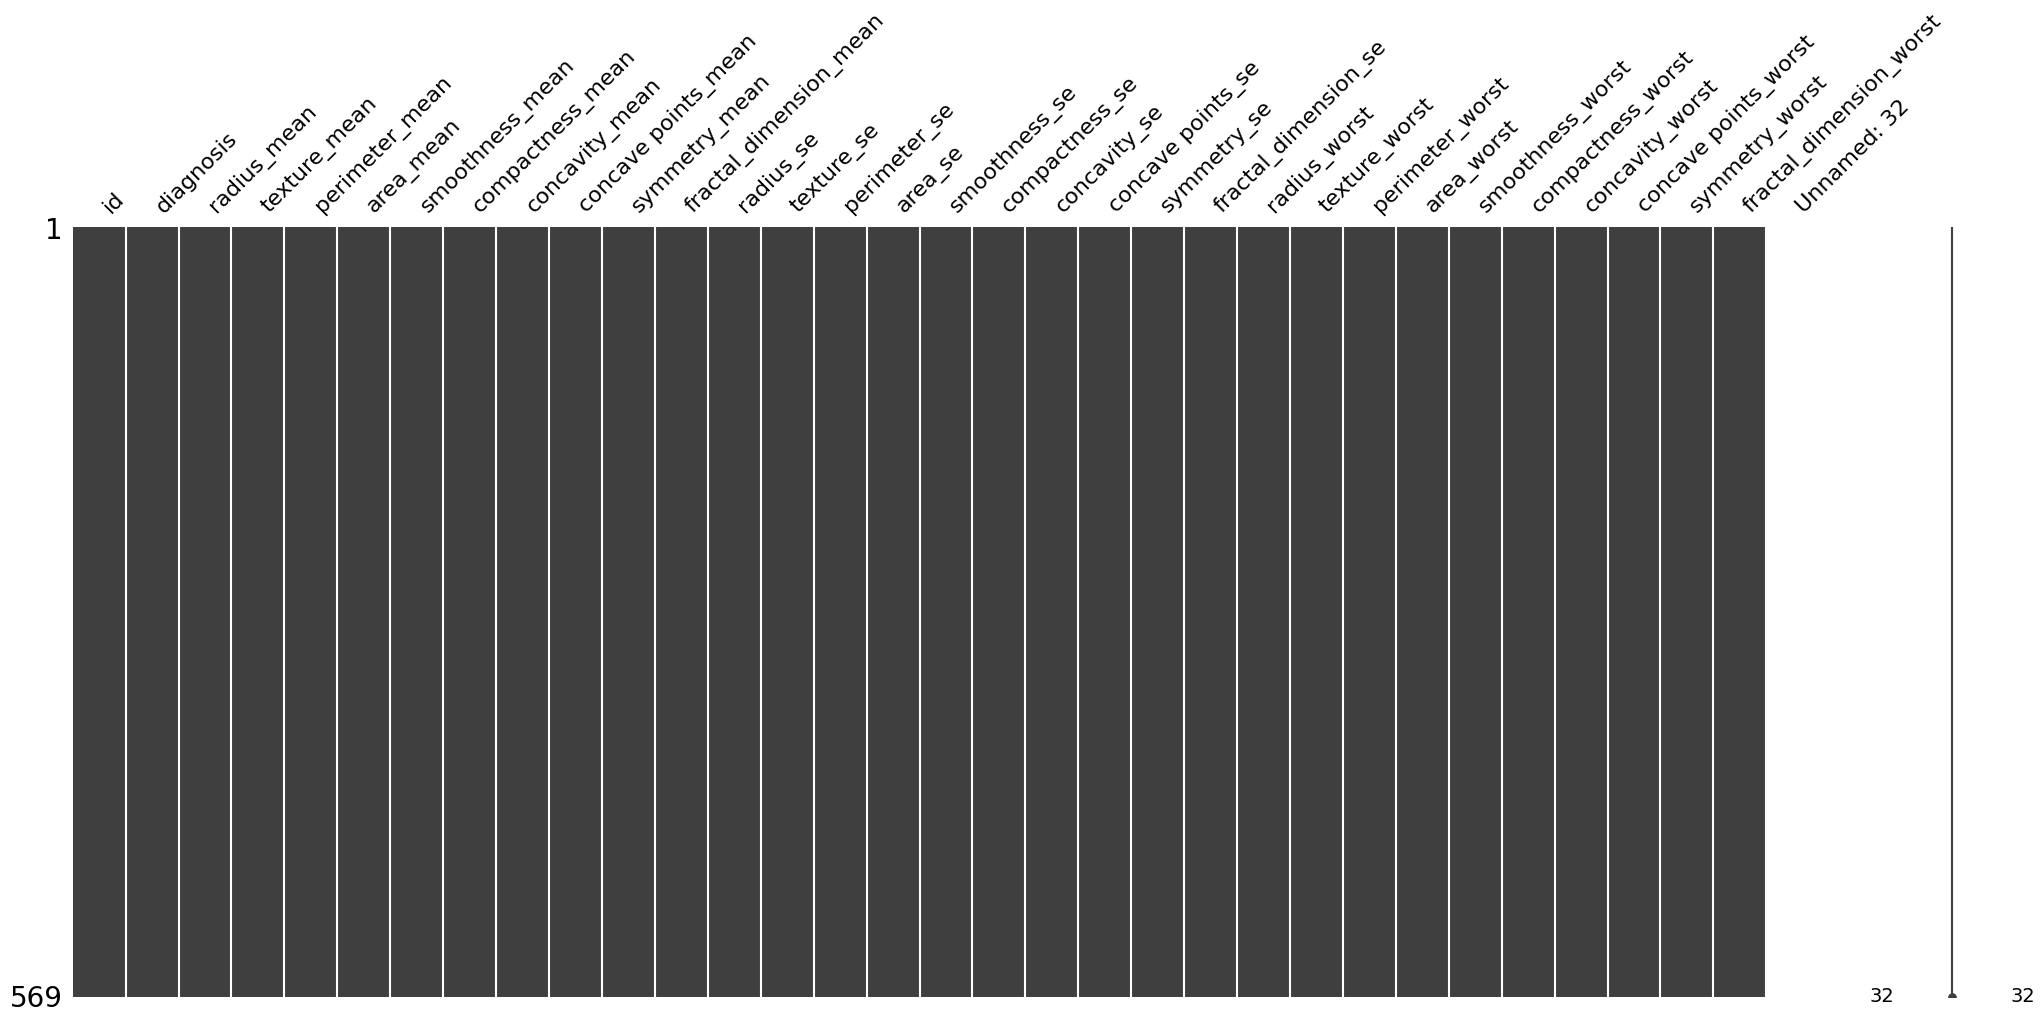

In [ ]:
#Check null via visualization
import missingno as msno
msno.matrix(df)

In [ ]:
#Drop the unnecessary features
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Check Duplicated

In [ ]:
df.duplicated().sum()

0

#Cehck Balance

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#Encoding Using Listed Comprehensive

In [ ]:
df['diagnosis']= [1 if i == 'M' else 0 for i in df['diagnosis']]
df['diagnosis'].unique()

array([1, 0])

#Correlation With heatmap

In [ ]:
#Calculate correlation for all the numerical values
corr = df.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
#Correlation between output coulum (diagnosis) and other features
corr =df.corr()
first_col = corr.iloc[:,0]
df_corr = pd.DataFrame({'diagnosis':first_col })
corr_final = df_corr.sort_values(by='diagnosis',ascending=False)

Text(0.5, 1.0, 'HeatMap')

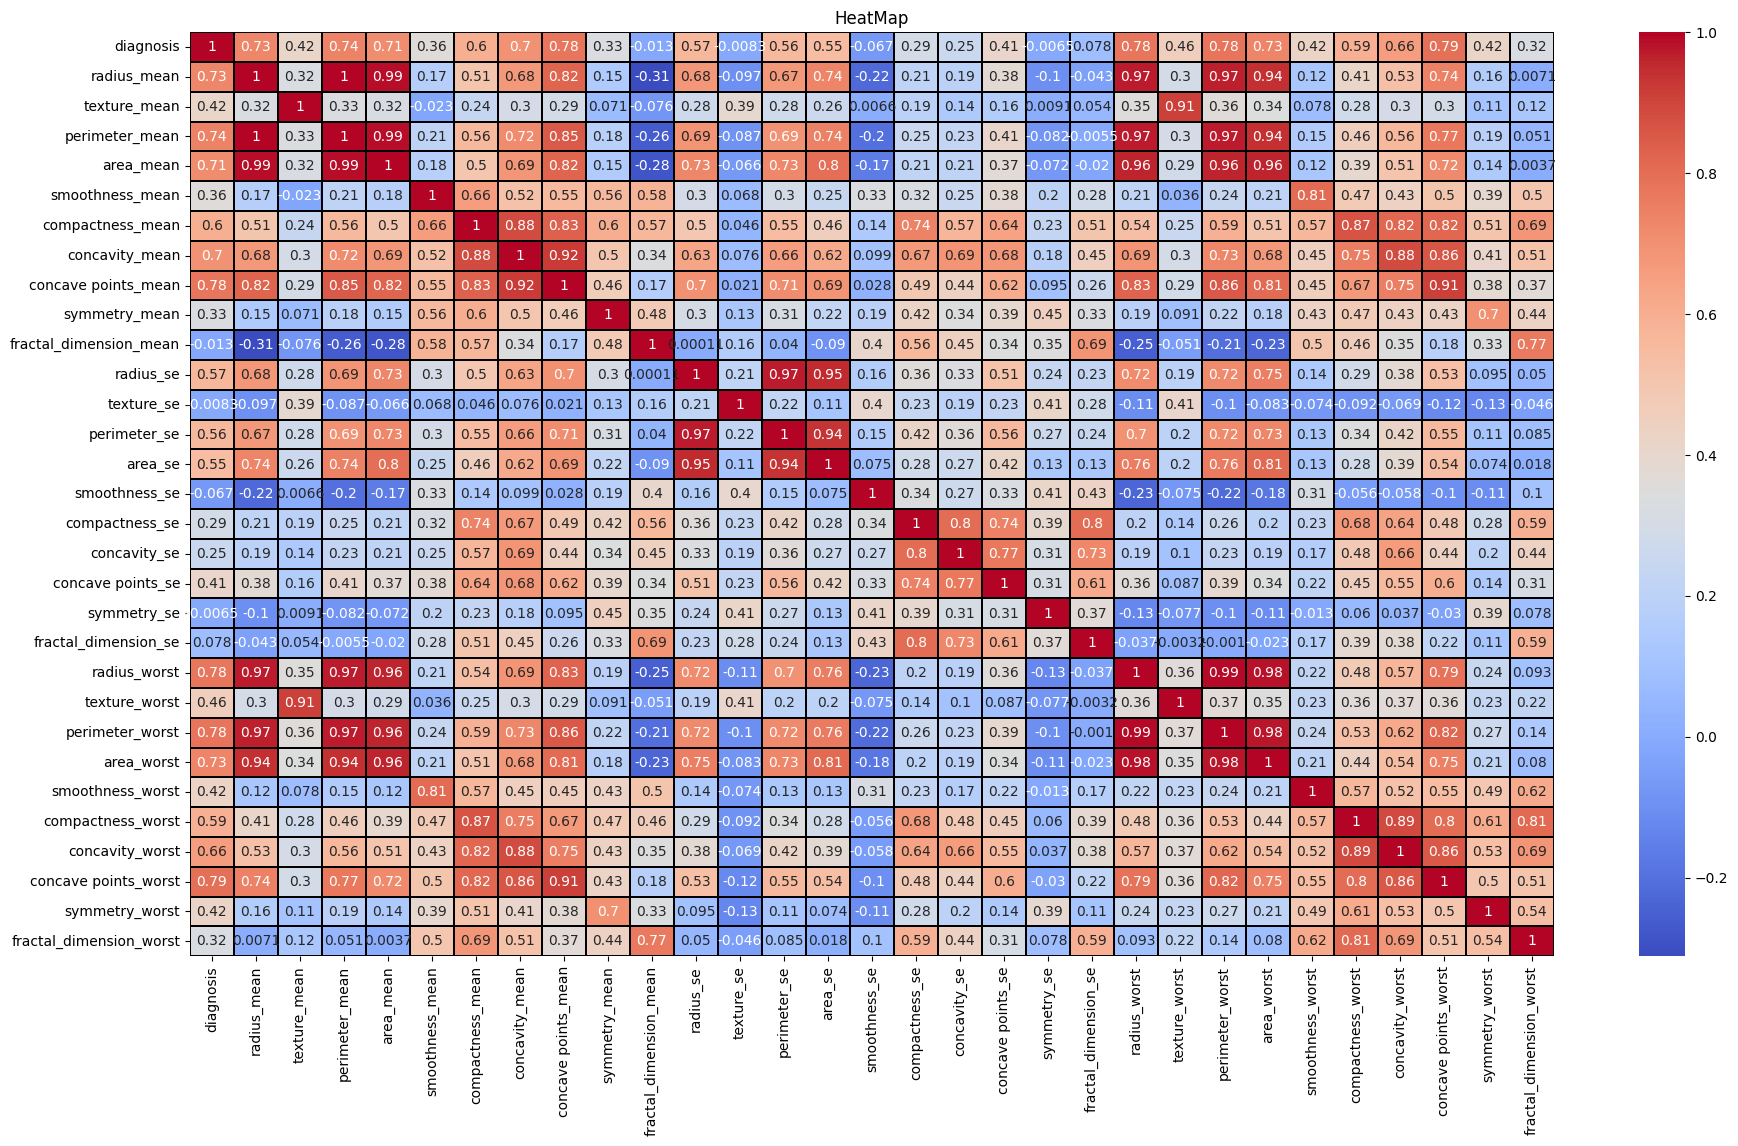

In [ ]:
#visualizing heatmap for all numeric data
plt.figure(figsize=(22,12))
sns.heatmap(corr,annot=True,linewidths=0.1,cmap='coolwarm',linecolor='black')
plt.title("HeatMap",)

<Axes: >

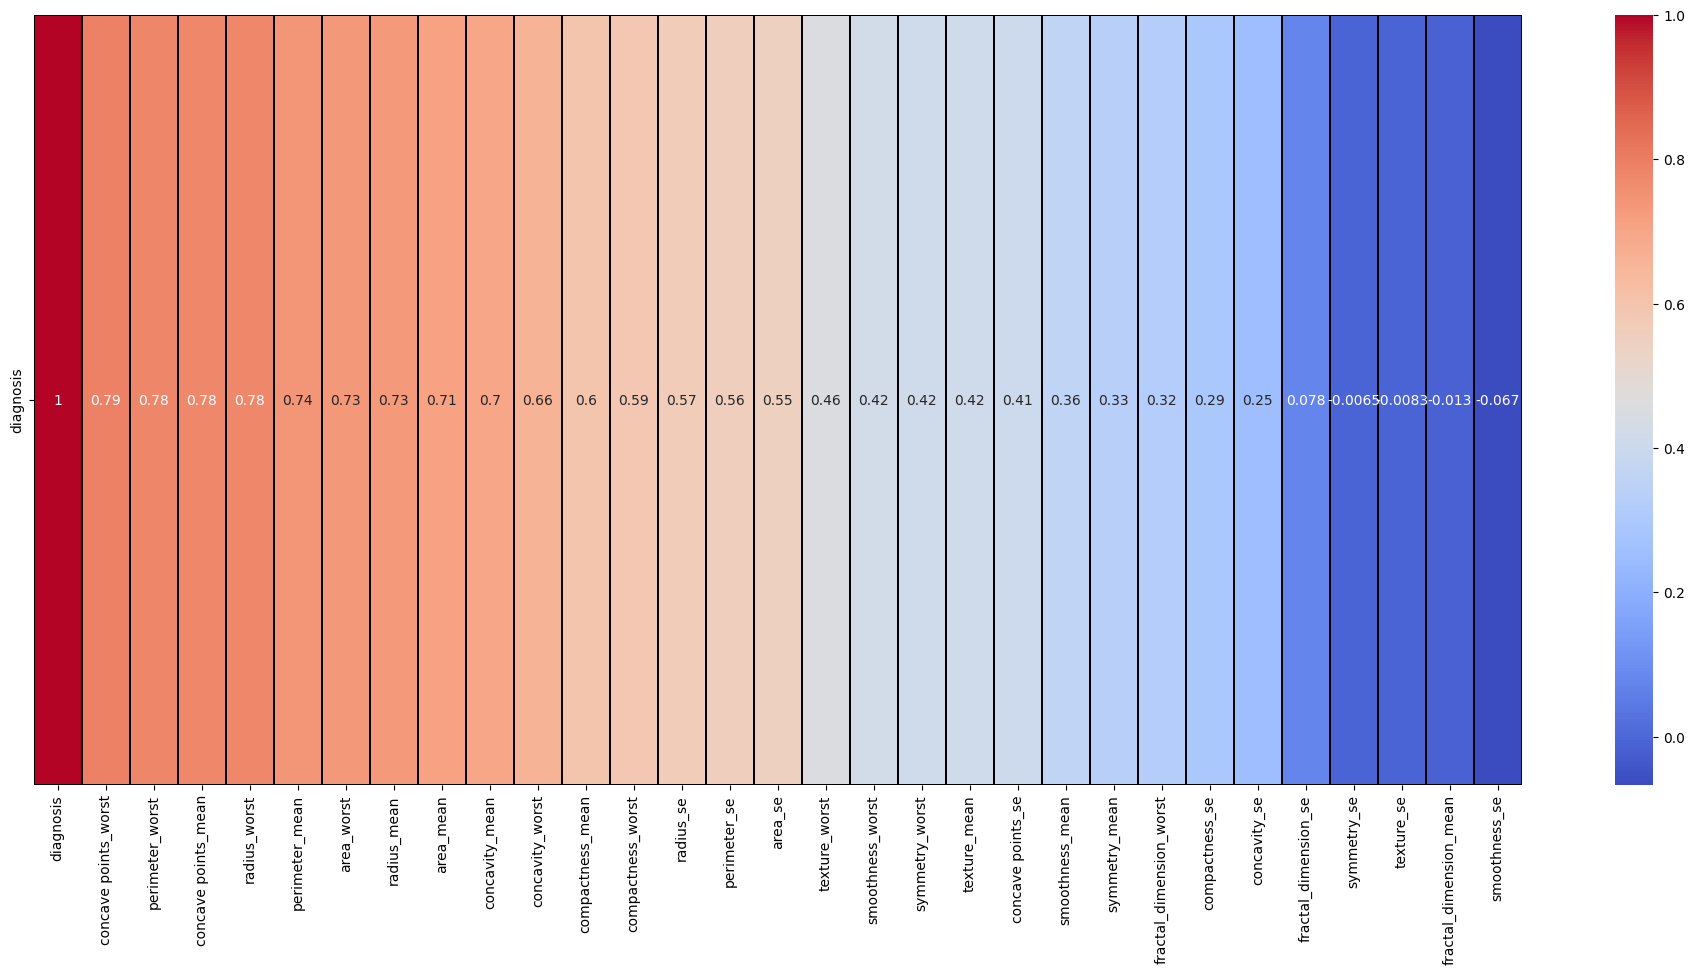

In [ ]:
#visualizing the final heatmap
plt.figure(figsize=(24,10))
sns.heatmap(corr_final.T,annot=True,cmap='coolwarm',linecolor='black',linewidths=0.08)

#Split Data

In [ ]:
x = df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.3,random_state=42)

#Scaling Data

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test= scaler.transform(x_test)

#KNN

###Grid Search

In [ ]:
knn =KNeighborsClassifier()

params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
          'p':[1,2]
}

grid = GridSearchCV(
    estimator=knn,
    param_grid=params,
    cv=5,
    scoring='accuracy'
)

###Build Model

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2]},
             scoring='accuracy')

###Best parameters and best (final) model  

In [ ]:
#best parameters
grid.best_params_

{'n_neighbors': 3, 'p': 1}

In [ ]:
#final model
final_model = grid.best_estimator_

###Check Overfitting

In [ ]:
#Check for training data
y_pred_train = final_model.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.9892086330935251

In [ ]:
#Check for validation data
y_pred_valid = final_model.predict(x_valid)
accuracy_score(y_pred_valid,y_valid)

0.9333333333333333

#Evaluation

In [ ]:
y_pred = final_model.predict(x_test)

In [ ]:
#general evaluation
accuracy_knn=accuracy_score(y_pred,y_test)
recall_knn=recall_score(y_pred,y_test)
precision_knn=precision_score(y_pred,y_test)
f1_knn=f1_score(y_pred,y_test)

In [ ]:
print(f'accuracy=  {accuracy_knn}')
print(f'recall=  {recall_knn}')
print(f'precision=  {precision_knn}')
print(f'f1=  {f1_knn}')

accuracy=  0.9590643274853801
recall=  0.9666666666666667
precision=  0.9206349206349206
f1=  0.943089430894309


In [ ]:
#Confusion Matrix
cf = confusion_matrix(y_pred,y_test)
print(cf)

[[106   5]
 [  2  58]]


<Axes: >

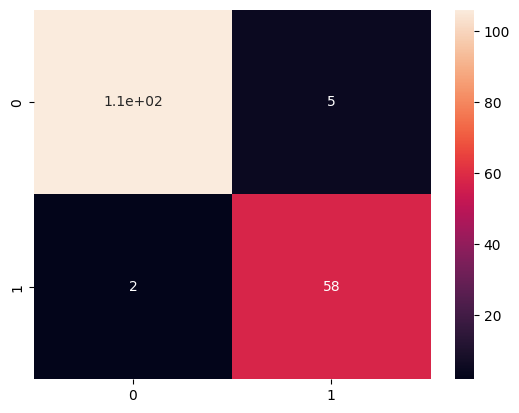

In [ ]:
#Visualizing confusion Matrix
sns.heatmap(cf,annot=True)

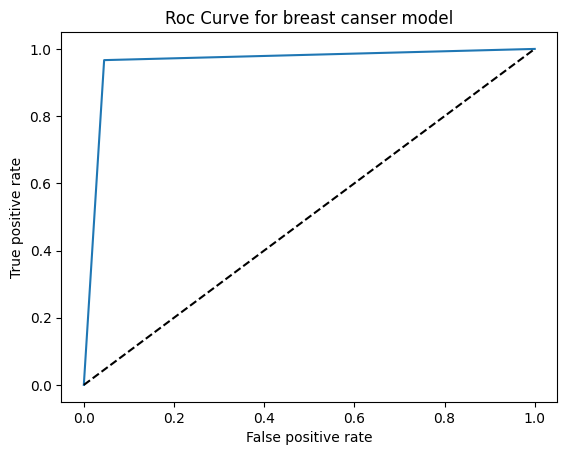

In [ ]:
#Roc_curve
fpr,tpr,thresholds = roc_curve(y_pred,y_test)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('Roc Curve for breast canser model')
plt.show()

In [ ]:
#Area under curve
auc = roc_auc_score(y_pred,y_test)
print(f"the result of auc = {auc*100}%")

the result of auc = 96.0810810810811%


#Decision Tree (Classifier)

###Grid Search

In [ ]:
classifier = DecisionTreeClassifier()

params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [3,4,5,6,7]
}

grid = GridSearchCV(
    estimator=classifier,
    param_grid=params,
    cv=5,
    scoring='accuracy'
)

###Build Model

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7]},
             scoring='accuracy')

###Best parameters and best (final) model  

In [ ]:
#best parameters
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [ ]:
#Best(Final) model
final_model = grid.best_estimator_

###Check Overfitting

In [ ]:
#Check for training data
y_pred_train = final_model.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.9712230215827338

In [ ]:
#Check for validation data
y_pred_valid = final_model.predict(x_valid)
accuracy_score(y_pred_valid,y_valid)

0.9

#Evaluation

In [ ]:
y_pred = final_model.predict(x_test)

In [ ]:
#general evaluation
accuracy_tree=accuracy_score(y_pred,y_test)
recall_tree=recall_score(y_pred,y_test)
precision_tree=precision_score(y_pred,y_test)
f1_tree=f1_score(y_pred,y_test)

In [ ]:
print(f'accuracy=  {accuracy_tree}')
print(f'recall=  {recall_tree}')
print(f'precision=  {precision_tree}')
print(f'f1=  {f1_tree}')

accuracy=  0.9473684210526315
recall=  0.9821428571428571
precision=  0.873015873015873
f1=  0.9243697478991596


In [ ]:
#Confusion Matrix
cf = confusion_matrix(y_pred,y_test)
print(cf)

[[107   8]
 [  1  55]]


<Axes: >

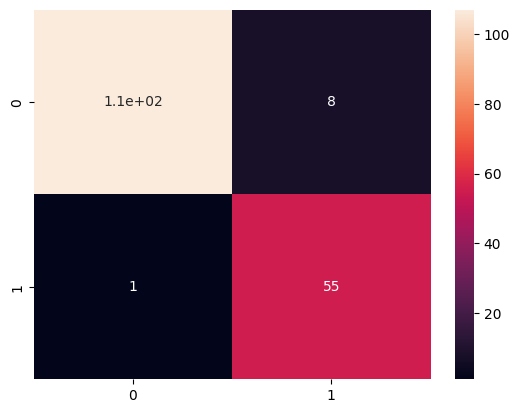

In [ ]:
#Visualizing confusion Matrix
sns.heatmap(cf,annot=True)

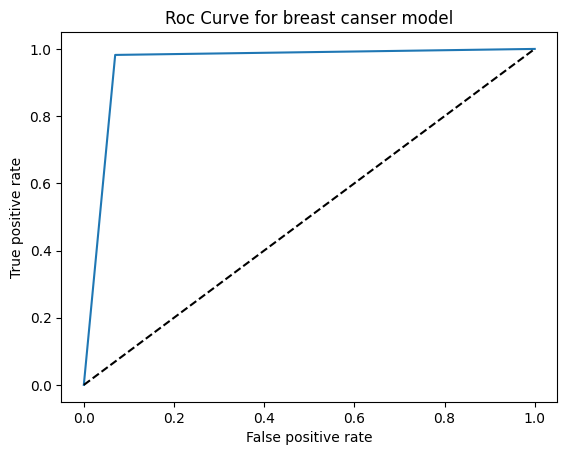

In [ ]:
#Roc_curve
fpr,tpr,thresholds = roc_curve(y_pred,y_test)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('Roc Curve for breast canser model')
plt.show()

In [ ]:
#Area under curve
auc = roc_auc_score(y_pred,y_test)
print(f"the result of auc = {auc*100}%")

the result of auc = 95.62888198757764%


#Logistic Regression

###Grid Search

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()

params={
    'penalty':['l1', 'l2'],
    'C':np.logspace(-3,3,7),
    'solver' :['lbfgs', 'liblinear',  'newton-cg']
}

grid = GridSearchCV(
    estimator=model,
    param_grid= params,
    cv=5,
    scoring='accuracy',
)

###Build Model

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

###Best parameters and best (final) model  

In [ ]:
#Best parameters
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
#best (final) model
final_model = grid.best_estimator_

###Check Overfitting

In [ ]:
#Check for training data
y_pred_train = final_model.predict(x_train)
accuracy_score(y_pred_train,y_train)

0.9856115107913669

In [ ]:
#Check for validation data
y_pred_valid = final_model.predict(x_valid)
accuracy_score(y_pred_valid,y_valid)

0.9666666666666667

#Evaluation

In [ ]:
y_pred = final_model.predict(x_test)

In [ ]:
#general evaluation
accuracy_logistic=accuracy_score(y_pred,y_test)
recall_logistic=recall_score(y_pred,y_test)
precision_logistic=precision_score(y_pred,y_test)
f1_logistic=f1_score(y_pred,y_test)

In [ ]:
print(f'accuracy=  {accuracy_logistic}')
print(f'recall=  {recall_logistic}')
print(f'precision=  {precision_logistic}')
print(f'f1=  {f1_logistic}')

accuracy=  0.9883040935672515
recall=  0.9841269841269841
precision=  0.9841269841269841
f1=  0.9841269841269841


In [ ]:
#Confusion Matrix
cf = confusion_matrix(y_pred,y_test)
print(cf)

[[107   1]
 [  1  62]]


<Axes: >

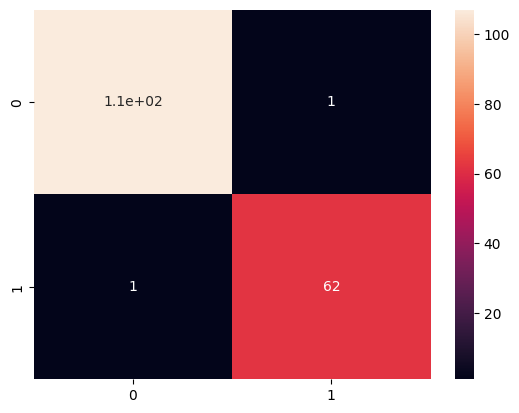

In [ ]:
#Visualizing confusion Matrix
sns.heatmap(cf,annot=True)

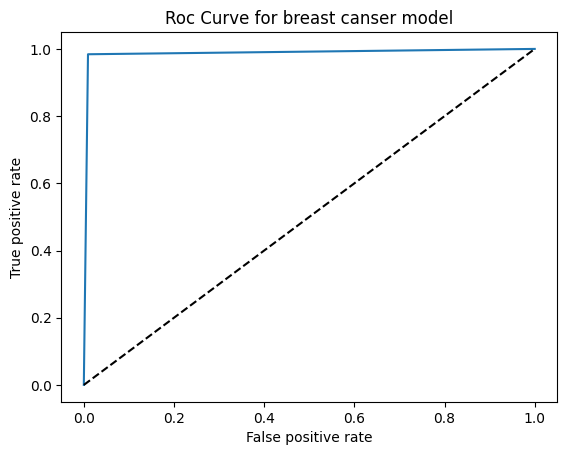

In [ ]:
#Roc_curve
fpr,tpr,thresholds = roc_curve(y_pred,y_test)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('Roc Curve for breast canser model')
plt.show()

In [ ]:
#Area under curve
auc = roc_auc_score(y_pred,y_test)
print(f"the result of auc = {auc*100}%")

the result of auc = 98.74338624338624%


#Comparison between Models

### Comparing Accuracy

In [ ]:
acc = {
    'Model':['KNN','Decision Tree','Logistic Regression'],
    'Accuracy' : [accuracy_knn,accuracy_tree,accuracy_logistic]
}
acc_df = pd.DataFrame(acc)

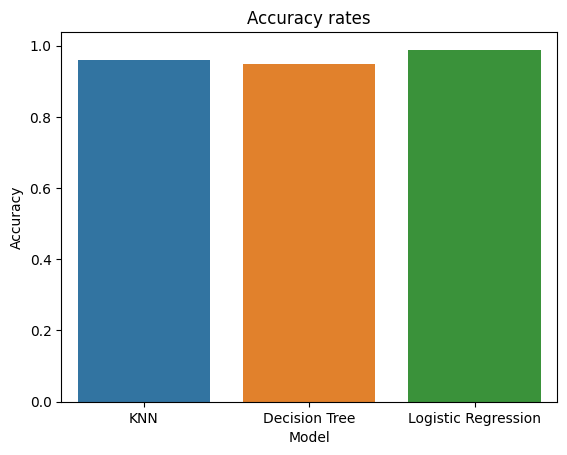

In [ ]:
#Using barplot to show us the comparsion
sns.barplot(acc_df,x=acc_df['Model'],y=acc_df['Accuracy'])
plt.title("Accuracy rates")
plt.show()

###Comparing Recall_Score

In [ ]:
rec = {
    'Model':['KNN','Decision Tree','Logistic Regression'],
    'Recall_Score' : [recall_knn,recall_tree,recall_logistic]
}
rec_df = pd.DataFrame(rec)

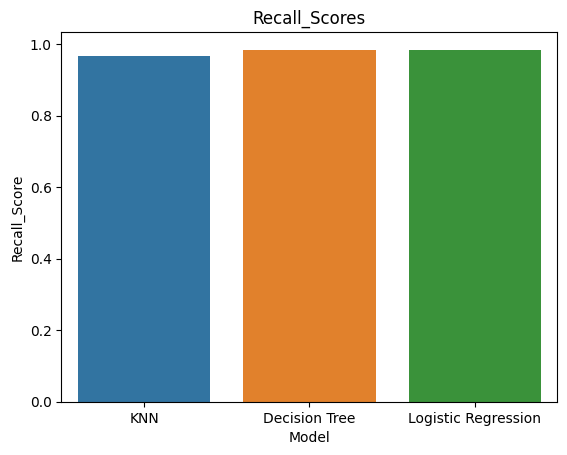

In [ ]:
#Using barplot to show us the comparsion
sns.barplot(rec_df,x=rec_df['Model'],y=rec_df['Recall_Score'])
plt.title("Recall_Scores")
plt.show()


###Comparing Precision

In [ ]:
pre = {
    'Model':['KNN','Decision Tree','Logistic Regression'],
    'Precision_Score' : [precision_knn,precision_tree,precision_logistic]
}
pre_df = pd.DataFrame(pre)

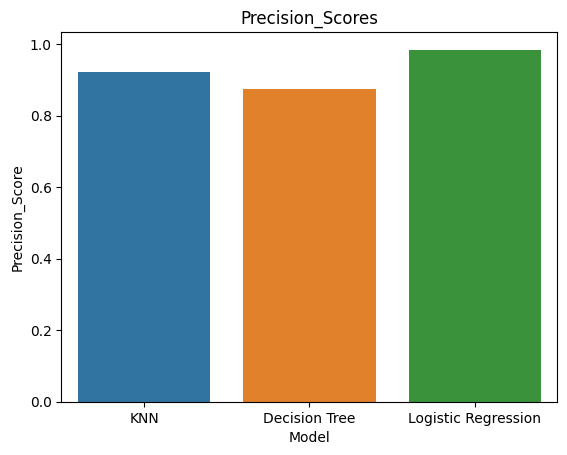

In [ ]:
#Using barplot to show us the comparsion
sns.barplot(pre_df,x=pre_df['Model'],y=pre_df['Precision_Score'])
plt.title("Precision_Scores")
plt.show()


###Comparing F1_Score

In [ ]:
f1 = {
    'Model':['KNN','Decision Tree','Logistic Regression'],
    'F1_Score' : [f1_knn,f1_tree,f1_logistic]
}
f1_df = pd.DataFrame(f1)

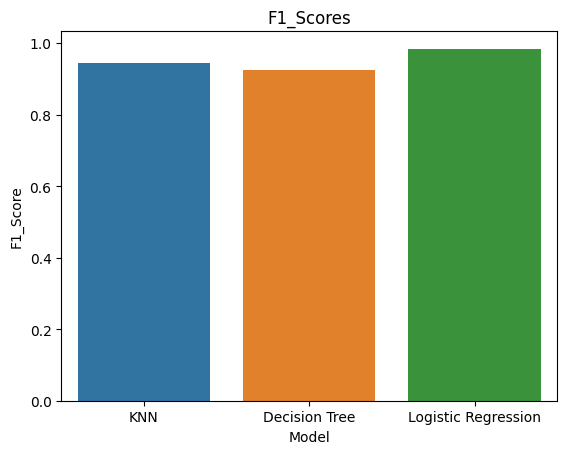

In [ ]:
#Using barplot to show us the comparsion
sns.barplot(f1_df,x=f1_df['Model'],y=f1_df['F1_Score'])
plt.title("F1_Scores")
plt.show()


In [ ]:
""" it seems that the Logistic Regression is the best model to be implemented on this dataset"""